# Introduction

The Kaggle competition focuses on the problem of forecasting the future values of multiple time series, as it has always been one of the most challenging problems in the field. More specifically, we aim the competition at testing state-of-the-art methods designed by the participants, on the problem of forecasting future web traffic for approximately 145,000 Wikipedia articles.

## Business Problem

Our Problem mainly focusses on predicting page views of a particular website given the past day's views
The ability to predict pageviews for a web page upholds a great value for any business, it can help in the following ways:

1) The business can prepare themselves for the traffic with enough servers so that the website doesn’t crash when the traffic high

2) It can monetize pages with high pageviews by enabling ads on that particular page

3) It can also help to now the general trend/opinions of people towards certain issues

## Why Machine Learning?
Although there exist many business intelligence tools, processing data in such large quantities and making optimum utilization of the data is not achieved like identifying the trend, anomalies, and especially forecasting. Doing a predictive analysis of such data is quite time-consuming and inaccurate if we use basic tools. Therefore using modern techniques like LTSM, CNN models helps us to use the hidden pattern in the data for predicting the future view of a particular website

## Data Collection

The data has been collected from the Kaggle: https://www.kaggle.com/c/web-traffic-time-series-forecasting/data

## Performance Metrics

We will be using SMAPE(Symmetric Mean Absolute Percentage Error) as our performance metrics. This is often used in forecasting problems. This has a range of [0,200]. As this is not inbuilt metrics in python, we will be implementing it from scratch and will use a custom metric to evaluate our models

## Data description
 1. train_1.csv - Consists of 145k time series. Each of these time series represent a number of daily views of a different Wikipedia article, starting from July, 1st, 2015 up until December 31st, 2016.
 2. train_2.csv - The second stage will use training data up until September 1st, 2017. 
 3. key_1.csv & key_2.csv - Gives the mapping between the page names and the shortened Id column used for prediction


In [88]:
## Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [89]:
train_1=pd.read_csv('train_1.csv',parse_dates=True)
key_1=pd.read_csv('key_1.csv')

In [ ]:
train_1.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [ ]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [ ]:
train_1.shape

(145063, 551)

In [ ]:
train_1.isnull().sum()

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2016-12-27     3701
2016-12-28     3822
2016-12-29     3826
2016-12-30     3635
2016-12-31     3465
Length: 551, dtype: int64

## Handling missing values
We can observe that there are a lot of missing values in the given data. Placements of those missing values NaN were at the biggining of the data for the individual data and most of the web pages are added after the given data and so its best to replace the NaN values with 0

In [ ]:
train_1=train_1.replace(np.NAN,0)
train_1.isnull().sum().sum()

0

## Data Visualization

Text(0.5, 1.0, 'Web traffic original data')

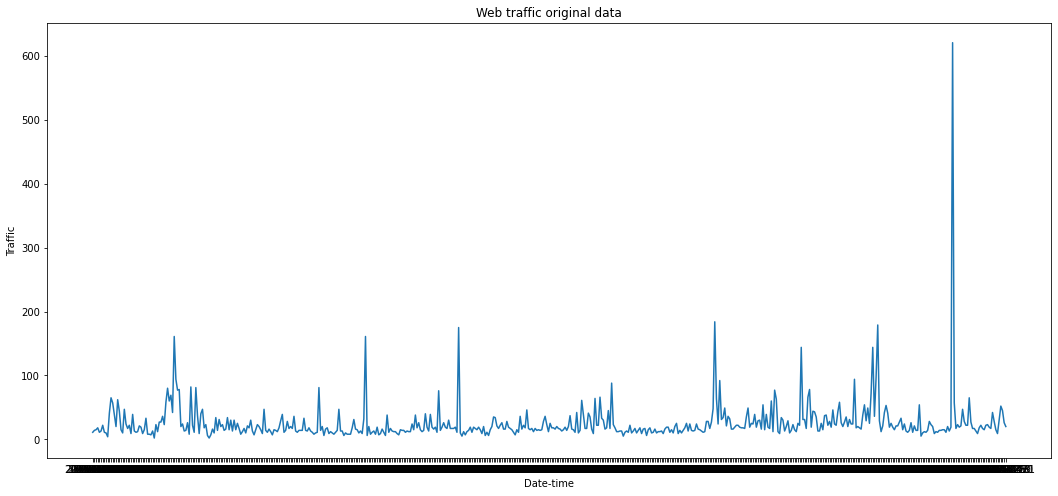

In [ ]:
#plotting the random time series to get the idea of basic flow of data
rcParams['figure.figsize']=18,8
y=train_1.loc[1][1:]
plt.plot(y)
plt.xlabel('Date-time')
plt.ylabel('Traffic')
plt.title('Web traffic original data')

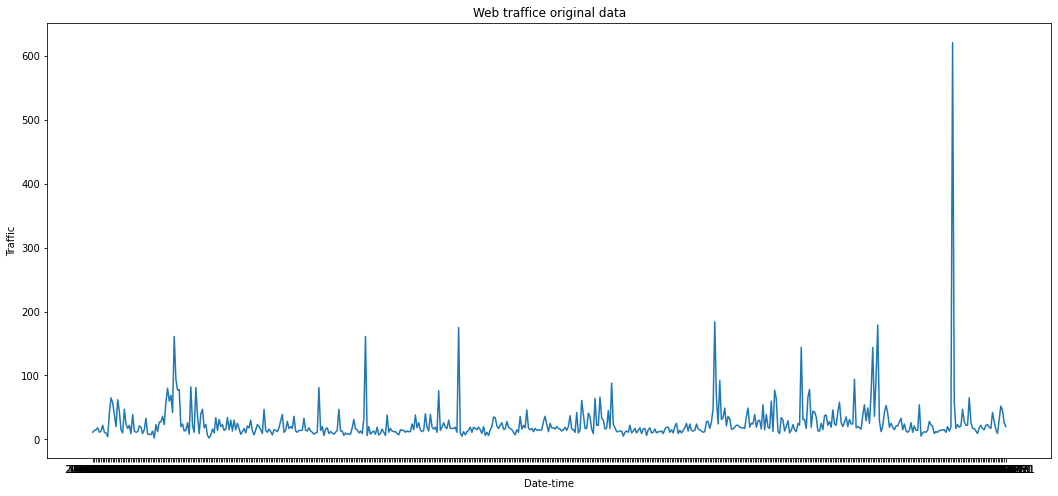

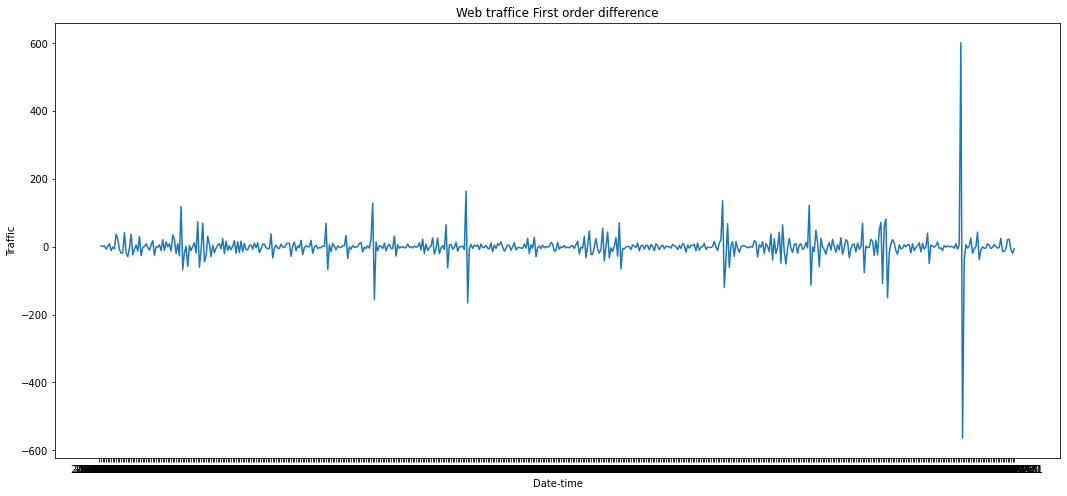

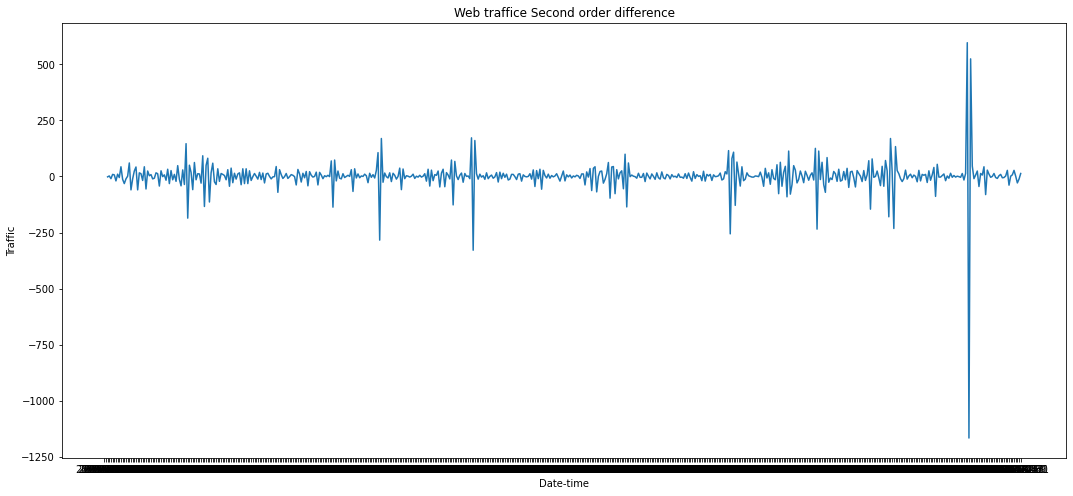

In [ ]:
# Now we will apply the first order and second order derivatives inroder to make the data to stationary
first_order=y.diff()
second_order=first_order.diff()

plt.plot(y)
plt.xlabel('Date-time',fontsize=10)
plt.ylabel('Traffic',fontsize=10)
plt.title('Web traffice original data')
plt.show()
#first order plot
plt.plot(first_order)
plt.xlabel('Date-time',fontsize=10)
plt.ylabel('Traffic',fontsize=10)
plt.title('Web traffice First order difference')
plt.show()
#2nd order plot
plt.plot(second_order)
plt.xlabel('Date-time',fontsize=10)
plt.ylabel('Traffic',fontsize=10)
plt.title('Web traffice Second order difference')
plt.show()

## Time Series decomposition: 

The decomposition of time series is a statistical task that deconstructs a time series into several components. Each component represents one of the underlying categories of patterns.

### Types of time series patterns:

 Trend(T): Reflects the long-term progression of the series. A trend exists when there is a persistent increasing or decreasing direction in the data.

Cyclic(C): Reflects repeated but non-periodic fluctuations. The duration of these fluctuations is usually of at least two years

Seasonal(S): Reflects seasonality present in the Time Series data, like demand for flip flops, will be highest during the summer season. Seasonality occurs at a fixed period of time could be weekly, monthly, quarterly, etc.

Random(R): Reflects random or irregular influences. This is residual after we have removed all other components from time-series data

credit: https://medium.datadriveninvestor.com/step-by-step-time-series-analysis-d2f117554d7e

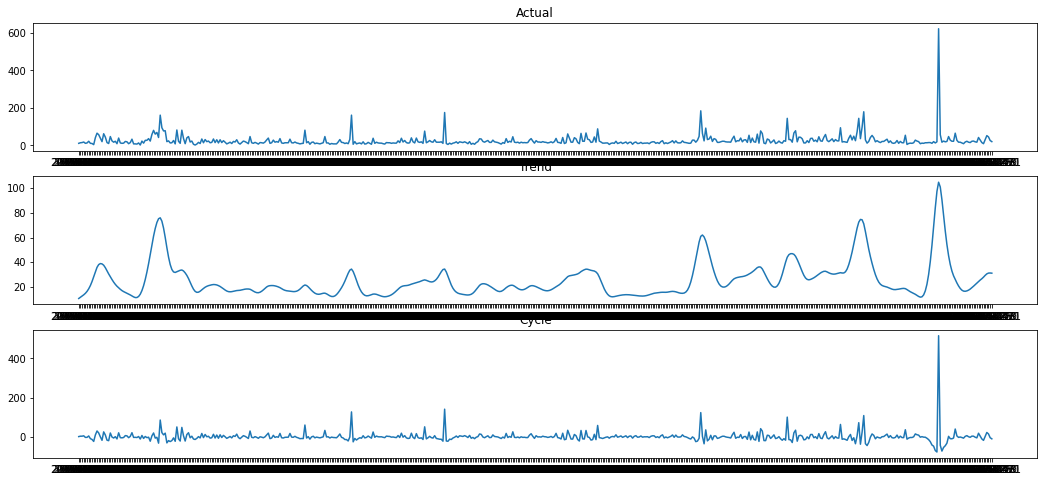

In [ ]:
import statsmodels.api as sm
series=y
cycle,trend=sm.tsa.filters.hpfilter(series,50)  #time series decomposition
fig,ax=plt.subplots(3,1)
ax[0].plot(series)
ax[0].set_title('Actual')
ax[1].plot(trend)
ax[1].set_title('Trend')
ax[2].plot(cycle)
ax[2].set_title('Cycle')
plt.show()


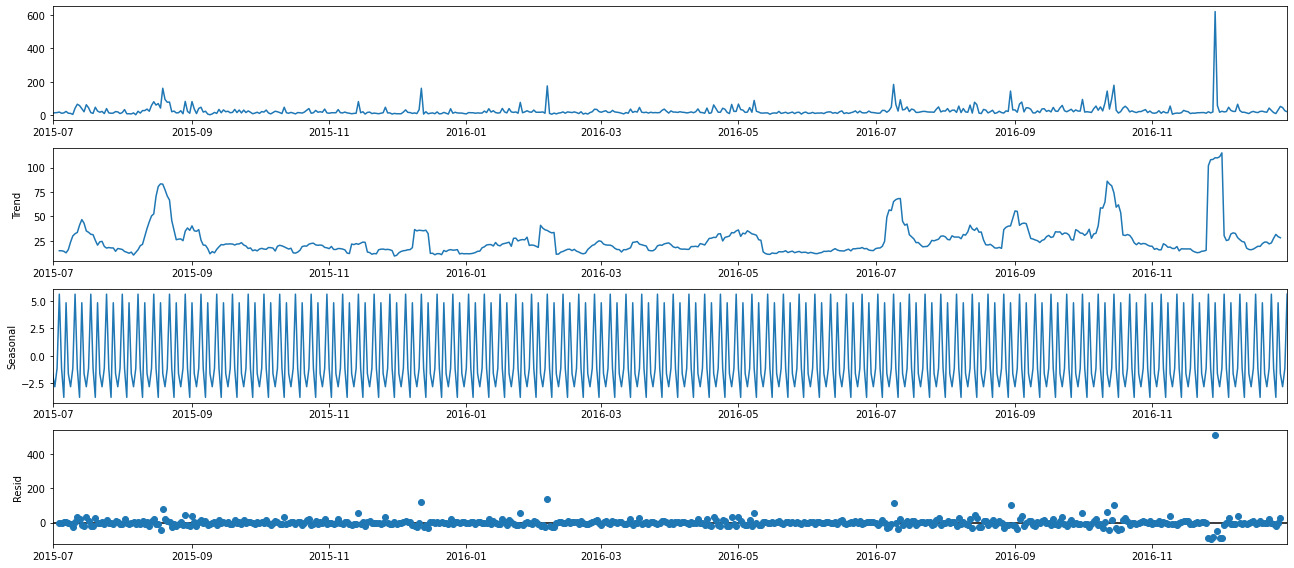

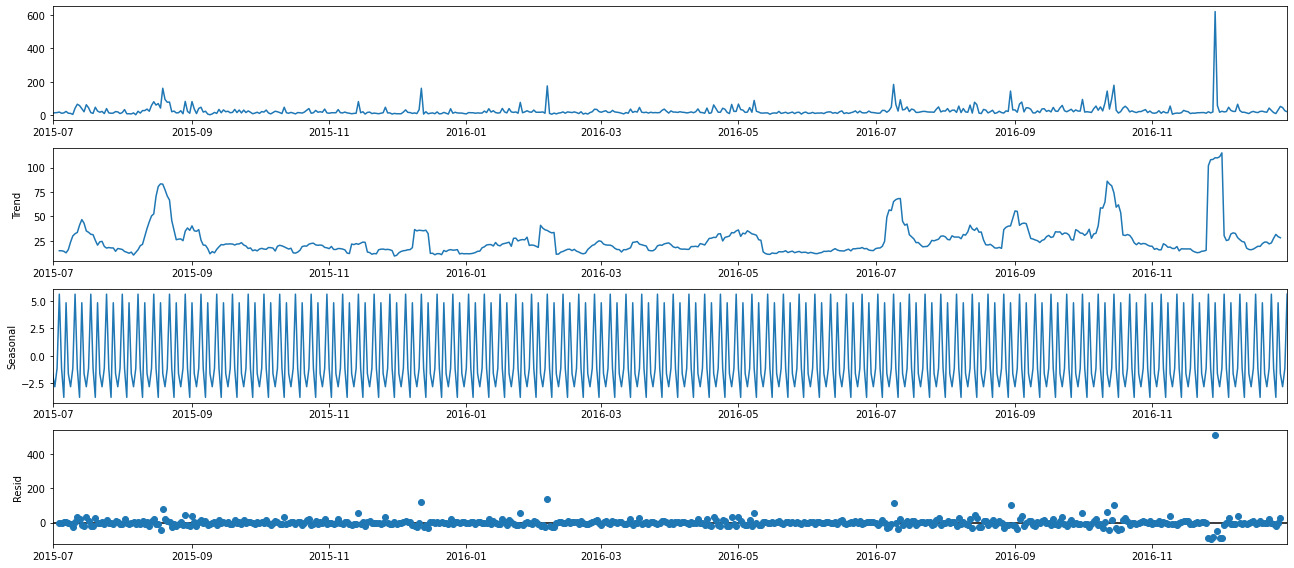

In [ ]:
ind=pd.to_datetime(y.index)
arr=[]
for i in range(len(y)):
    arr.append(y[i])
arr=pd.DataFrame(arr)
arr.index=ind
decomposition=sm.tsa.seasonal_decompose(arr)
decomposition.plot()


### ACF:  
ACF is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values. We plot these values along with the confidence band and tada! We have an ACF plot. In simple terms, it describes how well the present value of the series is related with its past values. A time series can have components like trend, seasonality, cyclic and residual. ACF considers all these components while finding correlations hence it’s a ‘complete auto-correlation plot’.

### PACF:
PACF is a partial auto-correlation function. Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals (which remains after removing the effects which are already explained by the earlier lag(s)) with the next lag value hence ‘partial’ and not ‘complete’ as we remove already found variations before we find the next correlation. So if there is any hidden information in the residual which can be modeled by the next lag, we might get a good correlation and we will keep that next lag as a feature while modeling. Remember while modeling we don’t want to keep too many features which are correlated as that can create multicollinearity issues. Hence we need to retain only the relevant features.

C:\Users\KalpanaG\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\KalpanaG\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
C:\Users\KalpanaG\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1024: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


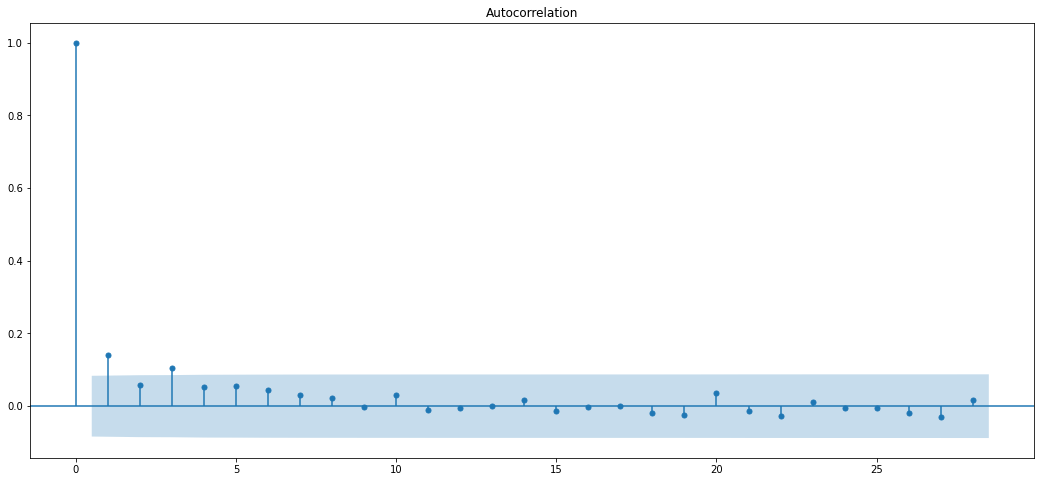

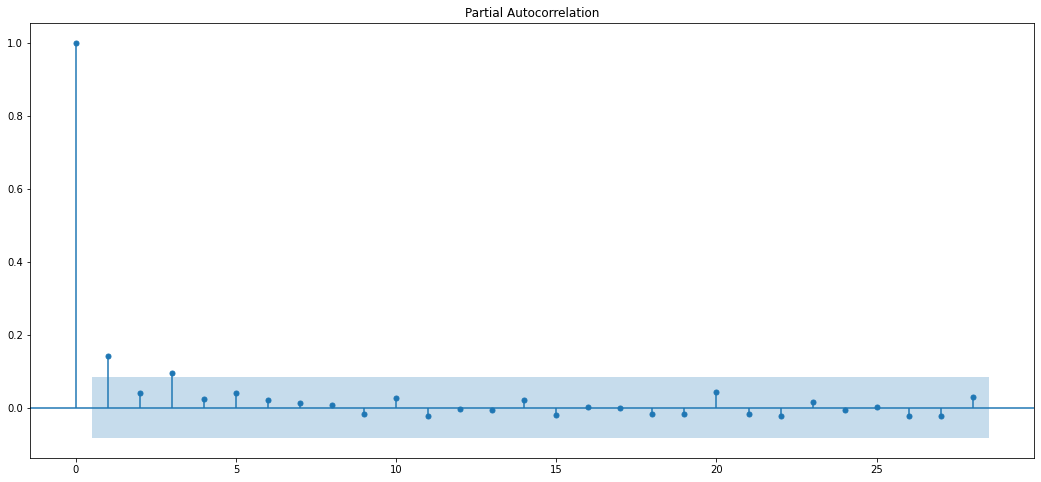

In [ ]:
#ACF and PCAF plots
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
plot_acf(arr)
plot_pacf(arr)
acf_values=sm.tsa.stattools.acf(y)
pacf_values=sm.tsa.stattools.pacf(y)

## Types of websites
Based on Langauge, type, access, topic

In [ ]:
train_1[['topic','lang','access','type']]=train_1['Page'].str.extract(r'(?P<topic>.*)\_(?P<lang>.*).wikipedia.org\_(?P<access>.*)\_(?P<type>.*)')

In [ ]:
train_1.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,topic,lang,access,type
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,14.0,20.0,22.0,19.0,18.0,20.0,2NE1,zh,all-access,spider
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,9.0,30.0,52.0,45.0,26.0,20.0,2PM,zh,all-access,spider
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,4.0,4.0,6.0,3.0,4.0,17.0,3C,zh,all-access,spider
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,16.0,11.0,17.0,19.0,10.0,11.0,4minute,zh,all-access,spider
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,11.0,27.0,13.0,36.0,10.0,52_Hz_I_Love_You,zh,all-access,spider


C:\Users\KalpanaG\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


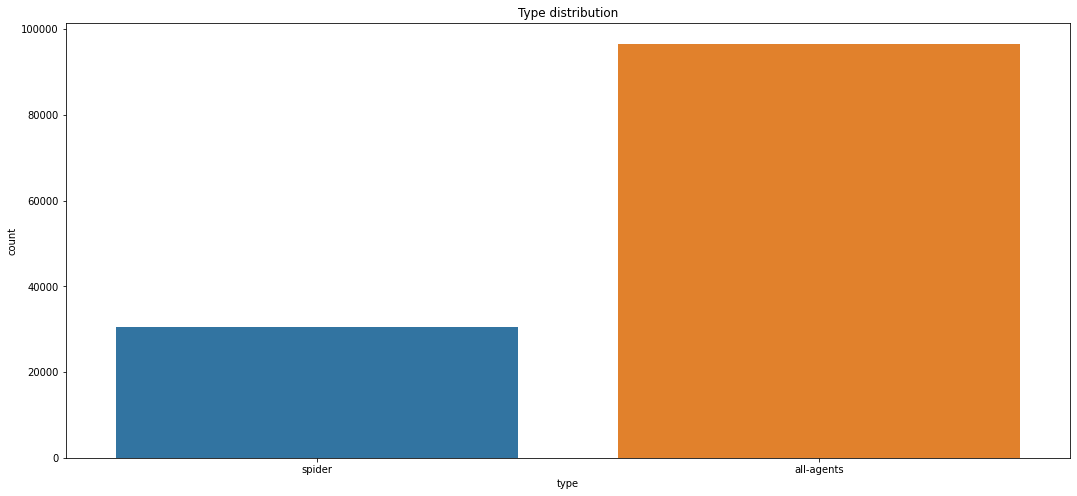

In [ ]:
plt.title('Type distribution')
sns.countplot(train_1['type'])
plt.show()

From the above plot, it is clear that most of the pages from all agents

C:\Users\KalpanaG\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


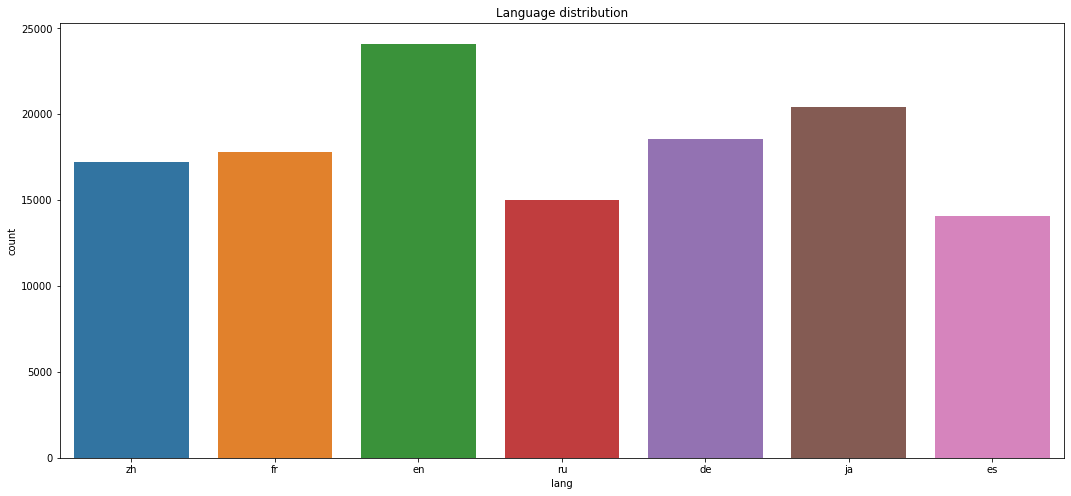

In [ ]:
plt.title('Language distribution')
sns.countplot(train_1['lang'])
plt.show()

English has the highest number of pages than japanese. We will plot the median of everyday of each language

C:\Users\KalpanaG\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\KalpanaG\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\KalpanaG\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

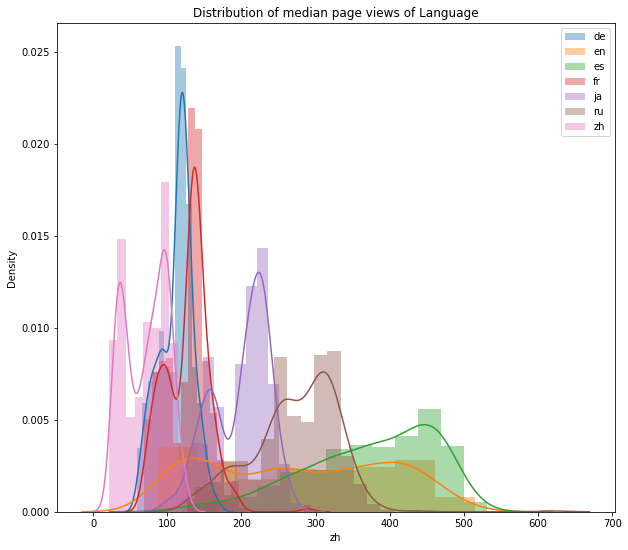

In [ ]:
language_df=train_1.groupby('lang').median()
langs=language_df.index.values

plt.figure(figsize=(10,9))
plt.title('Distribution of median page views of Language')
for i in langs:
    sns.distplot(language_df.xs(i),label=i)
    plt.legend()

de - Germany, es-spanish, fr- french,zh - chinese

Observations: 


<AxesSubplot:>

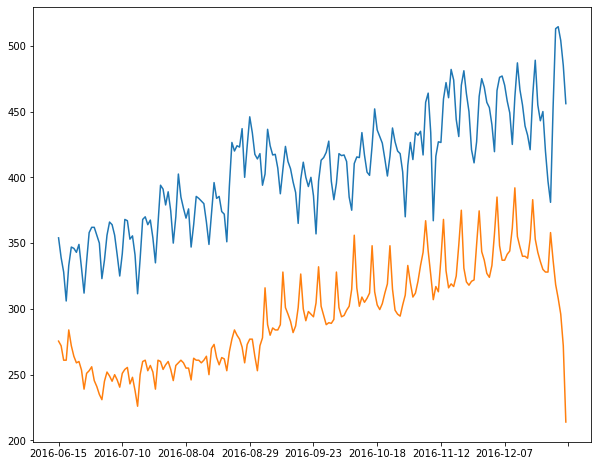

In [ ]:
#We can check the stationarity of each language
plt.figure(figsize=(10,8))
language_df.xs('en')[350:550].plot()
language_df.xs('ru')[350:550].plot()

C:\Users\KalpanaG\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


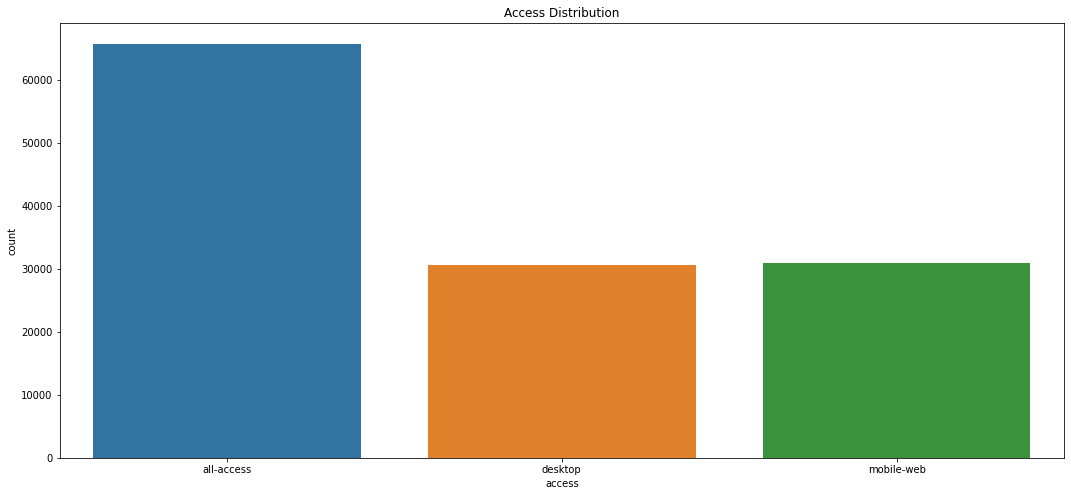

In [ ]:
#Access distribution
plt.title("Access Distribution")
sns.countplot(train_1["access"])
plt.show()

## Access language plots

In [ ]:
access_lang_df=train_1.groupby(['lang','access']).median()

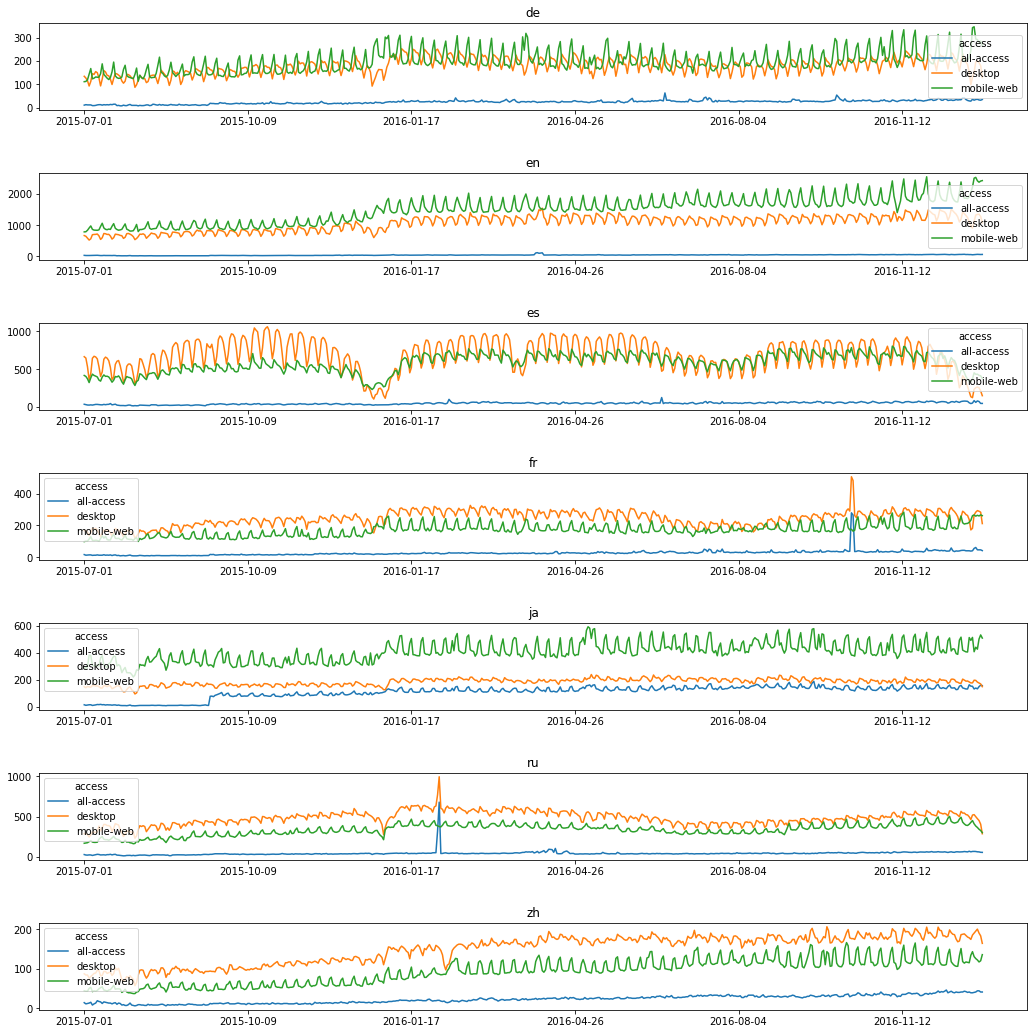

In [ ]:
f,a=plt.subplots(7,1,figsize=(15,15))
for i,j in enumerate(langs):
    ax=a[i]
    access_lang_df.xs(j).T.plot(ax=ax)
    ax.set_title(j)
f.tight_layout(pad=3.0)

### Observations


## Type Language Plots

In [ ]:
type_language_df=train_1.groupby(['lang','type']).median()

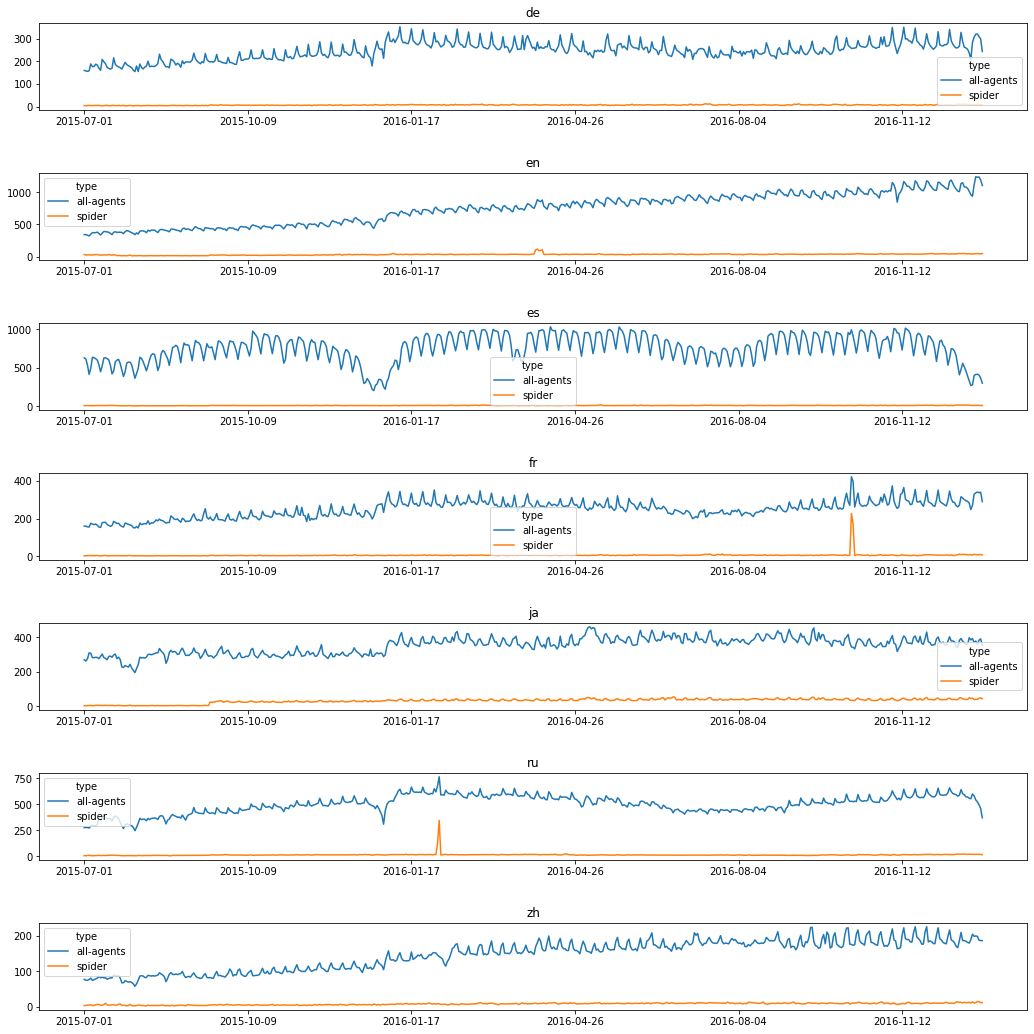

In [ ]:
f,a=plt.subplots(7,1,figsize=(15,15))
for i,j in enumerate(langs):
    ax=a[i]
    type_language_df.xs(j).T.plot(ax=ax)
    ax.set_title(j)
f.tight_layout(pad=3.0)

## Topics

In [ ]:
topic_count=train_1['topic'].value_counts()

C:\Users\KalpanaG\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Distribution of No. of times topic searched'}, xlabel='topic', ylabel='count'>

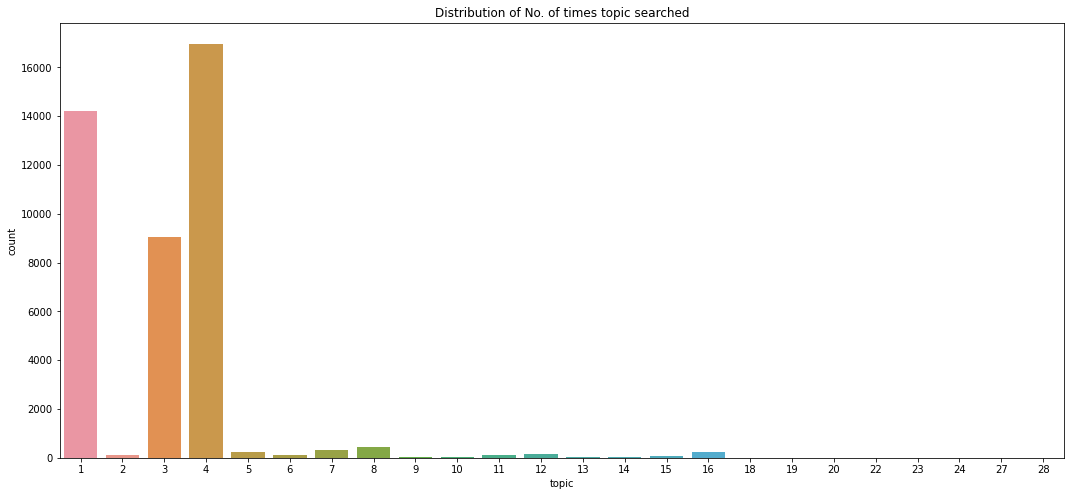

In [ ]:
plt.title('Distribution of No. of times topic searched')
sns.countplot(topic_count)

There are some topics searched repeatedly in the data. So will group them together as High, Medium and Low based on number of searches.

In [ ]:
print('No of high searched / popular topics: ', len(topic_count[topic_count>=5]))
print('No of medium searched topics: ', len(topic_count[(topic_count<5) & (topic_count>2)]))
print('No of low searched topics: ', len(topic_count[topic_count<2]))

No of high searched / popular topics:  1860
No of medium searched topics:  26016
No of low searched topics:  14217


## Days analysis

In [ ]:
melt_df=pd.melt(train_1.iloc[:,0:550],'Page',var_name='Date')

In [ ]:
melt_df['Date']=pd.to_datetime(melt_df['Date'])
melt_df['Day']=melt_df['Date'].dt.weekday
melt_df['week']=melt_df['Date'].dt.isocalendar().week

In [ ]:
melt_df['Day'].replace(0,'Sunday',inplace=True)
melt_df['Day'].replace(1,'Monday',inplace=True)
melt_df['Day'].replace(2,'Tuesday',inplace=True)
melt_df['Day'].replace(3,'Wednesday',inplace=True)
melt_df['Day'].replace(4,'Thursday',inplace=True)
melt_df['Day'].replace(5,'Friday',inplace=True)
melt_df['Day'].replace(6,'Saturday',inplace=True)

In [ ]:
views_day=melt_df.groupby('Day')['value'].sum()

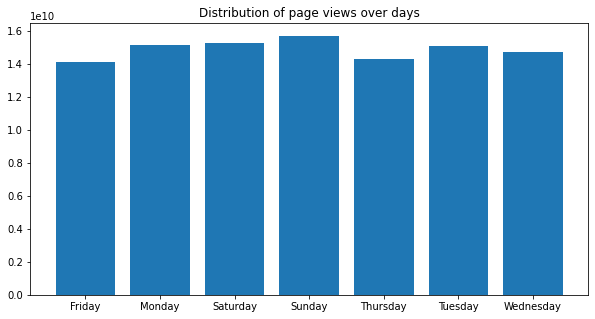

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Distribution of page views over days')
plt.bar(views_day.index,views_day.values)
plt.show()

We can observe that more page views on weekends than other days